# Depth 25

## With NA values

/tmp/ipykernel_4692/3738086732.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['correct'] = df_filtered['correct'].apply(lambda x: True if x == 'true' else False if x == 'false' else pd.NA)
/tmp/ipykernel_4692/3738086732.py:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['case'] = df_filtered['promptFile'].apply(lambda x: 'yes' if 'yes' in x else 'no')


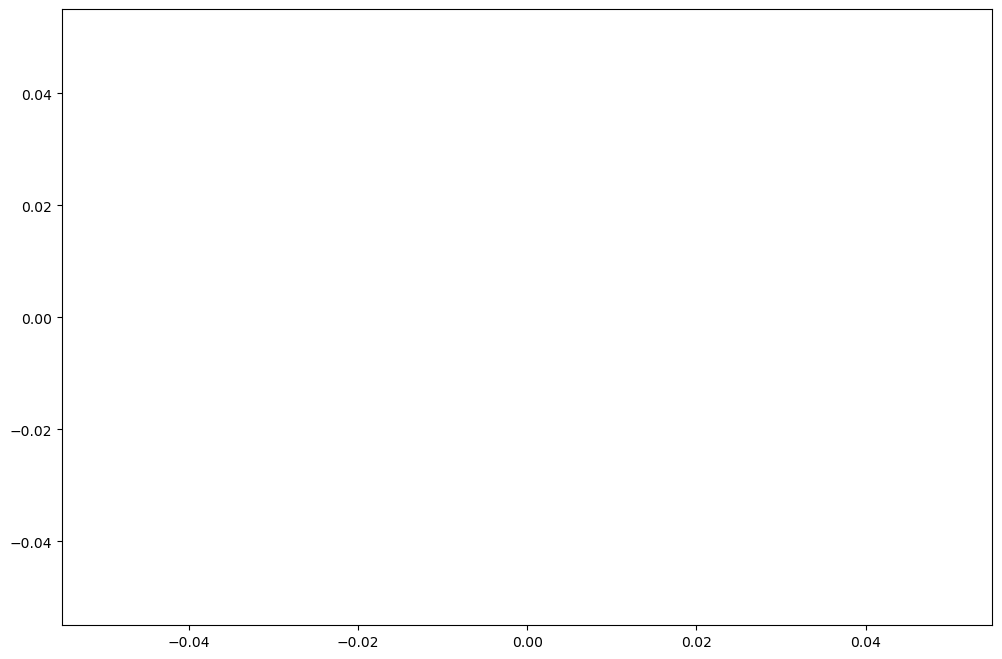

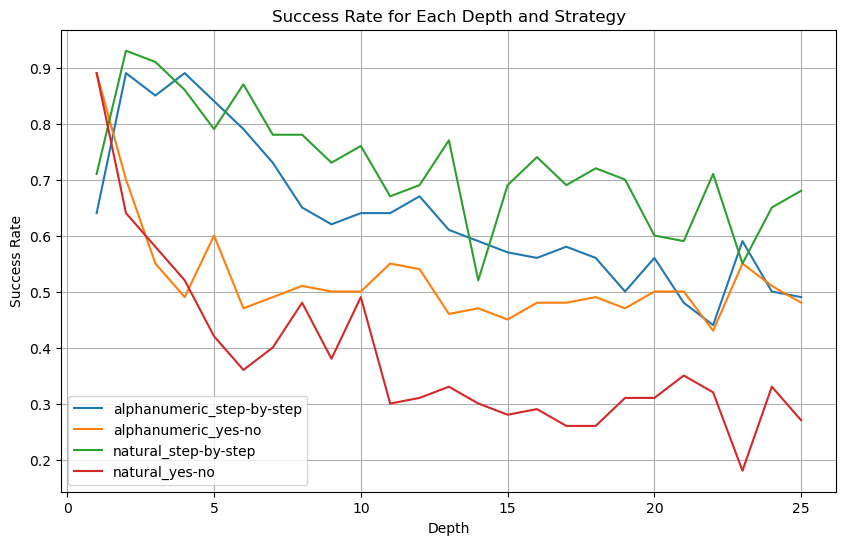

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the TSV file
file_path = 'blabber-25.tsv'
df = pd.read_csv(file_path, delimiter='\t')

# Filter rows where the "answer" column is NaN
df_filtered = df[df['answer'].isna()]

# Convert the 'correct' column to boolean
df_filtered['correct'] = df_filtered['correct'].apply(lambda x: True if x == 'true' else False if x == 'false' else pd.NA)

# Extract 'yes' and 'no' cases from the 'prompt' column
df_filtered['case'] = df_filtered['promptFile'].apply(lambda x: 'yes' if 'yes' in x else 'no')

# Group by strategy, case, and depth, calculate success rate and count
grouped_df = df_filtered.groupby(['strategy', 'case', 'depth'])['correct'].agg(['mean', 'count']).reset_index()

# Define colorblind-friendly colors
colors = ['#0072B2', '#009E73', '#D55E00', '#CC79A7']

# Plot the success rate for each strategy with different lines and colors for 'yes' and 'no' cases
plt.figure(figsize=(12, 8))

for i, strategy in enumerate(grouped_df['strategy'].unique()):
    for case in ['yes', 'no']:
        case_data = grouped_df[(grouped_df['strategy'] == strategy) & (grouped_df['case'] == case)]
        plt.plot(case_data['depth'], case_data['mean'], label=f"{strategy} - {case} (n={case_data['count'].sum()})", marker='o', color=colors[i])

# Set plot labels and title
#plt.xlabel('Depth')
#plt.ylabel('Success Rate')
#plt.title('Success Rate and Count for Each Depth, Strategy, and Case (filtered for NaN answers)')
#plt.legend()
#plt.grid(True)
#plt.show()

# Group by strategy and depth, calculate success rate
success_rate_df = df.groupby(['strategy', 'depth'])['correct'].mean().reset_index()

# Plot the success rate for each strategy with different lines
plt.figure(figsize=(10, 6))
for strategy in success_rate_df['strategy'].unique():
    strategy_data = success_rate_df[success_rate_df['strategy'] == strategy]
    plt.plot(strategy_data['depth'], strategy_data['correct'], label=strategy)

# Set plot labels and title
plt.xlabel('Depth')
plt.ylabel('Success Rate')
plt.title('Success Rate for Each Depth and Strategy')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

## Without NA values

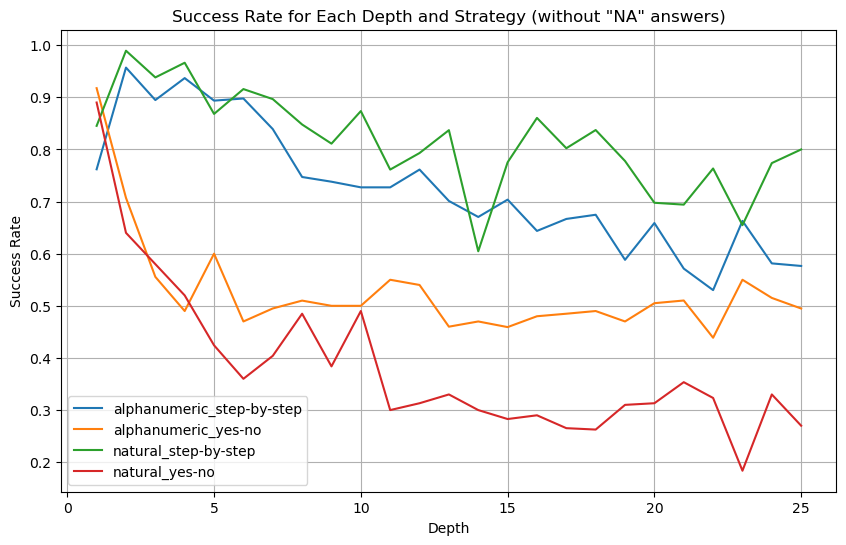

In [2]:
# Filter rows where the "answer" column is "NA"
df_filtered = df[df['answer'].notna()]

# Group by strategy and depth, calculate success rate
success_rate_df = df_filtered.groupby(['strategy', 'depth'])['correct'].mean().reset_index()

# Plot the success rate for each strategy with different lines
plt.figure(figsize=(10, 6))
for strategy in success_rate_df['strategy'].unique():
    strategy_data = success_rate_df[success_rate_df['strategy'] == strategy]
    plt.plot(strategy_data['depth'], strategy_data['correct'], label=strategy)

# Set plot labels and title
plt.xlabel('Depth')
plt.ylabel('Success Rate')
plt.title('Success Rate for Each Depth and Strategy (without "NA" answers)')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

# Depth 50

## With NA values

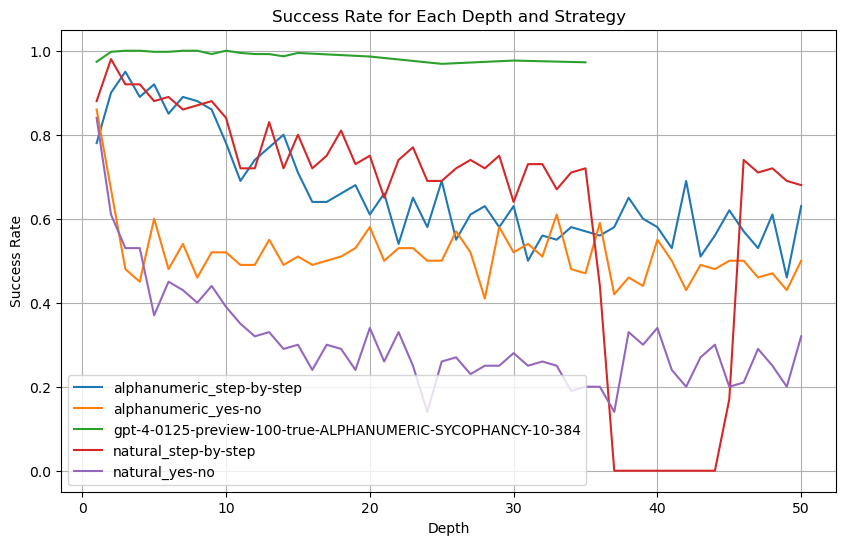

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the TSV file
file_path = 'blabber-50.tsv'
df = pd.read_csv(file_path, delimiter='\t')

# Group by strategy and depth, calculate success rate
success_rate_df = df.groupby(['strategy', 'depth'])['correct'].mean().reset_index()

# Plot the success rate for each strategy with different lines
plt.figure(figsize=(10, 6))
for strategy in success_rate_df['strategy'].unique():
    strategy_data = success_rate_df[success_rate_df['strategy'] == strategy]
    plt.plot(strategy_data['depth'], strategy_data['correct'], label=strategy)

# Set plot labels and title
plt.xlabel('Depth')
plt.ylabel('Success Rate')
plt.title('Success Rate for Each Depth and Strategy')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

## Without NA values

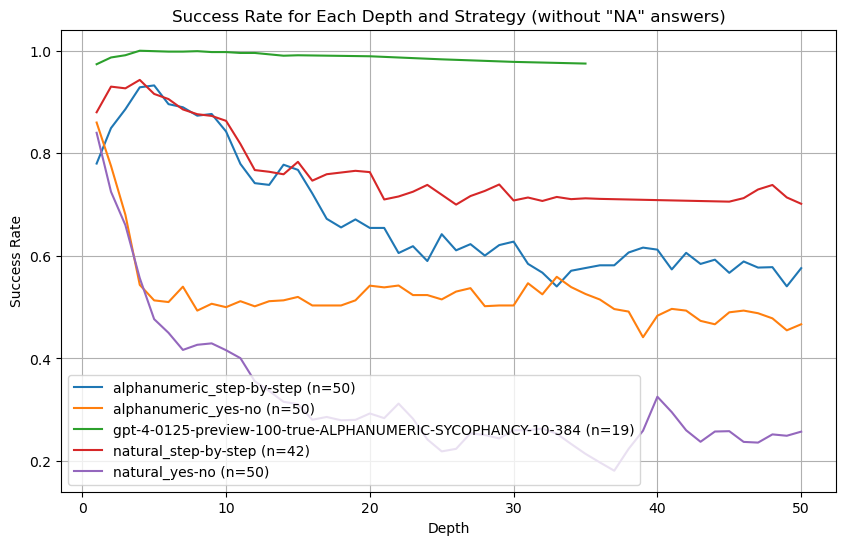

In [4]:
# Filter rows where the "answer" column is "NA"
df_filtered = df[df['answer'].notna()]

# Group by strategy and depth, calculate success rate
success_rate_df = df_filtered.groupby(['strategy', 'depth'])['correct'].mean().reset_index()

# Plot the success rate for each strategy with different lines
plt.figure(figsize=(10, 6))
for i, strategy in enumerate(success_rate_df['strategy'].unique()):
    strategy_data = success_rate_df[success_rate_df['strategy'] == strategy]
    
    # Apply a rolling average with window size 3 (you can adjust this value)
    rolling_mean = strategy_data['correct'].rolling(window=3, min_periods=1).mean()
    
    plt.plot(strategy_data['depth'], rolling_mean, label=f"{strategy} (n={len(strategy_data)})")


# Set plot labels and title
plt.xlabel('Depth')
plt.ylabel('Success Rate')
plt.title('Success Rate for Each Depth and Strategy (without "NA" answers)')
plt.legend(loc='lower left')
plt.grid(True)
plt.savefig('success_rate_plot.png', dpi=300)
plt.show()

/tmp/ipykernel_4692/2303697486.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['case'] = df_filtered['promptFile'].apply(lambda x: 'yes' if 'yes' in x else 'no')


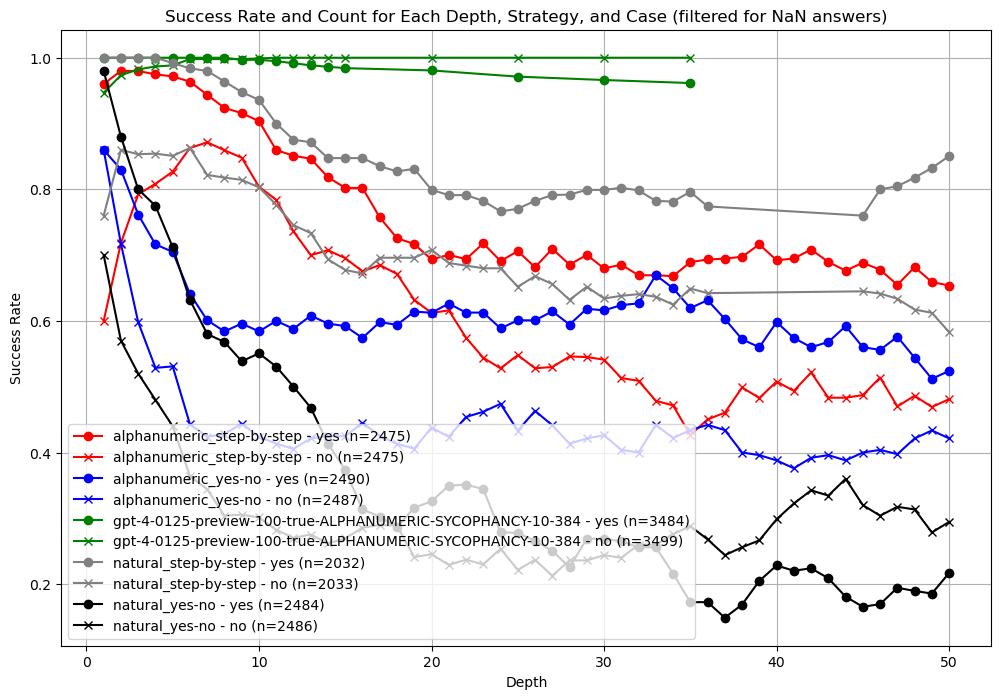

In [5]:
# Filter rows where the "answer" column is NaN
df_filtered = df[df['answer'].notna()]

# Extract 'yes' and 'no' cases from the 'prompt' column
df_filtered['case'] = df_filtered['promptFile'].apply(lambda x: 'yes' if 'yes' in x else 'no')

# Group by strategy, case, and depth, calculate success rate and count
grouped_df = df_filtered.groupby(['strategy', 'case', 'depth'])['correct'].agg(['mean', 'count']).reset_index()

# Define colorblind-friendly colors
colors = ['red', 'blue', 'green', 'gray', 'black']

# Plot the success rate for each strategy with different lines and colors for 'yes' and 'no' cases
plt.figure(figsize=(12, 8))

for i, strategy in enumerate(grouped_df['strategy'].unique()):
    for case in ['yes', 'no']:
        if case == 'yes':
            m = 'o'
        else:
            m = 'x'
        case_data = grouped_df[(grouped_df['strategy'] == strategy) & (grouped_df['case'] == case)]
        
        # Apply a rolling average with window size 3 (you can adjust this value)
        rolling_mean = case_data['mean'].rolling(window=5, min_periods=1).mean()
        
        plt.plot(case_data['depth'], rolling_mean, label=f"{strategy} - {case} (n={case_data['count'].sum()})", marker=m, color=colors[i])

# Set plot labels and title
plt.xlabel('Depth')
plt.ylabel('Success Rate')
plt.title('Success Rate and Count for Each Depth, Strategy, and Case (filtered for NaN answers)')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()

## GPT-4

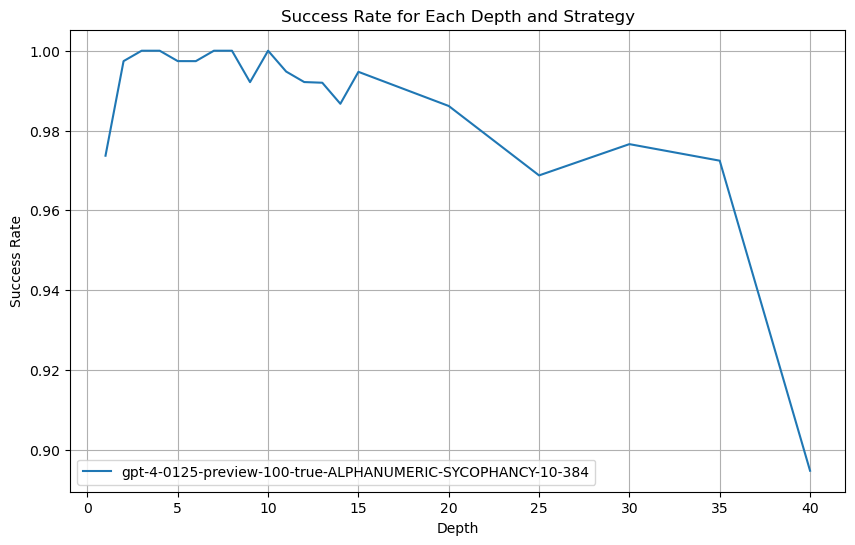

In [6]:
import pandas as pd
import matplotlib.pyplot as plt

# Read the data from the TSV file
file_path = 'blabber-gpt-4-0125-preview-100-true-ALPHANUMERIC-SYCOPHANCY-10-384.tsv'
df = pd.read_csv(file_path, delimiter='\t')

# Group by strategy and depth, calculate success rate
success_rate_df = df.groupby(['strategy', 'depth'])['correct'].mean().reset_index()

# Plot the success rate for each strategy with different lines
plt.figure(figsize=(10, 6))
for strategy in success_rate_df['strategy'].unique():
    strategy_data = success_rate_df[success_rate_df['strategy'] == strategy]
    plt.plot(strategy_data['depth'], strategy_data['correct'], label=strategy)

# Set plot labels and title
plt.xlabel('Depth')
plt.ylabel('Success Rate')
plt.title('Success Rate for Each Depth and Strategy')
plt.legend(loc='lower left')
plt.grid(True)
plt.show()